In [101]:
import numpy as np
import open3d as o3d
import re
from ipywidgets import interact
from lib.datasets.kitti_utils import Calibration
from pathlib import Path
import xml.etree.ElementTree as ET
import cv2

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
from tools.dataset_util import Dataset
idx = 10
dataset = Dataset("train", r"/mnt/e/DataSet/kitti")

In [103]:
mask, blank = dataset.get_blank(idx)
image = dataset.get_image(idx)

In [104]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
eroded_mask = cv2.erode(mask, kernel, iterations = 1)

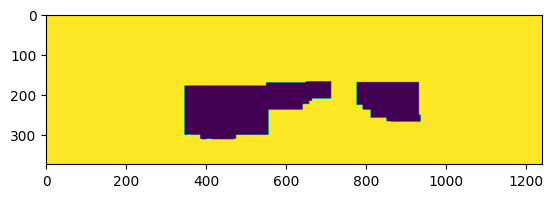

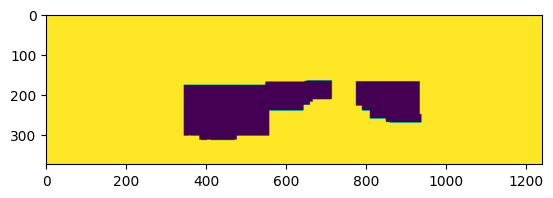

In [105]:

import matplotlib.pyplot as plt
plt.imshow(mask)
plt.show()

plt.imshow(eroded_mask)
plt.show()

In [107]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
mask_dir = Path(r"/mnt/e/DataSet/kitti/training/mask_3/")
blank_dir = Path(r"/mnt/e/DataSet/kitti/training/blank/")
for idx in range(7481):
    file_name = blank_dir / (str(idx).zfill(6) + ".png")
    mask, blank = dataset.get_blank(idx)
    if mask is None:
        continue
    cv2.imwrite(str(file_name), blank)
    

In [109]:
import os
all_files = os.listdir(str(mask_dir))
all_files.sort()
print(all_files)

['000000.png', '000001.png', '000002.png', '000003.png', '000004.png', '000005.png', '000006.png', '000007.png', '000009.png', '000010.png', '000011.png', '000012.png', '000013.png', '000014.png', '000015.png', '000017.png', '000018.png', '000019.png', '000020.png', '000022.png', '000023.png', '000026.png', '000027.png', '000028.png', '000029.png', '000030.png', '000033.png', '000035.png', '000036.png', '000040.png', '000041.png', '000042.png', '000043.png', '000044.png', '000045.png', '000048.png', '000051.png', '000054.png', '000055.png', '000056.png', '000058.png', '000059.png', '000061.png', '000062.png', '000065.png', '000069.png', '000070.png', '000071.png', '000072.png', '000073.png', '000074.png', '000076.png', '000081.png', '000082.png', '000084.png', '000085.png', '000087.png', '000088.png', '000090.png', '000091.png', '000094.png', '000096.png', '000097.png', '000100.png', '000101.png', '000102.png', '000103.png', '000104.png', '000105.png', '000106.png', '000108.png', '0001

In [110]:
all_files_range = os.listdir(str(blank_dir))
print(len(all_files_range), len(all_files))

4301 4301


In [119]:
depth_dir = Path(r"/mnt/e/DataSet/kitti/training/velodyne_depth/")
all_depth = os.listdir(str(depth_dir))
for i in range(4300, -1, -1):
    os.rename(depth_dir / all_depth[i], depth_dir / all_files[i])
    
    

In [115]:
list(range(3, -1, -1))

[3, 2, 1, 0]